# Practical Work 3 - Convolutional neural network (CNN)

## Introduction

Main goal: construction of a simple convolutional neural network with Keras.
Many possibilities for improvement:
- optimization of the number of layers / kernel / activations;
- architecture;
- regularization;
- ...

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as tk

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Activation,Lambda,Flatten,Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

## MNIST dataset
The MNIST data is loaded. The parameters of the database are retrieved (number of examples, of classes, size of the retina).

In [ ]:
# MNIST dataset loading
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Number of samples in the training dataset
num_examples = x_train.shape[0] 
# Number of samples in the test dataset
num_test = x_test.shape[0]
# Size of the input layer (retina) = number of pixels of the MNIST images (784 pixels)
num_input = x_train.shape[1]*x_train.shape[2]
# Number of classes ( the 10 digits : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9})
num_classes = 10

# Width ( and height) of the images
img_size = x_train.shape[1] 
# Size of (square) image
img_shape = (img_size, img_size)

# Reshape of datatsets in array (<=> tensor with 4 dimensions) and normalization
x_train = x_train.reshape(num_examples, img_size, img_size, 1)/255
x_test = x_test.reshape(x_test.shape[0], img_size, img_size, 1)/255

# Print
print('Size of the retina : ',num_input)
print("Number of samples  : ",num_examples)

# Converts the label arrays (integers) to binary class matrix.
y_train = tk.utils.to_categorical(y_train, num_classes)
y_test = tk.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
Size of the retina :  784
Number of samples  :  60000


## Construction of the model
### Global parameters of the algorithm

In [ ]:
# Learning rate
lr = 0.001
# Number of epochs 
num_epochs = 25
# Size of batch
batch_size = 128
# Dropout regularization ( here the probability of keeping the neuron)
dropout = 0.75

### DEfinition of the layers of the CNN

**CONV1-RELU-MAX POOLING - CONV2-RELU-MAX POOLING - FCL-DROPOUT-Prediction**

- Sequential model : [Sequential groups a linear stack of layers](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential);
- CONV : [2D convolution layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D);
- MAX POOLING : [Max pooling operation for 2D spatial data.](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D);
- Flatten : [Flattens the input. Does not affect the batch size.](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten);
- FCL  : [Fully-connected layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense);
- DROPOUT : [Applies Dropout to the input.](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout).

Remarks: 
- the size of the convolution kernel is (5x5);
- the max pooling operation work on a (2x2) region.

In [ ]:
# Create a sequential model
model = Sequential()
# Add layers
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(img_size, img_size,1),name='Conv1'))
model.add(MaxPooling2D(pool_size=(2, 2),name='MaxPool1'))
model.add(Conv2D(64, (5, 5), activation='relu',name='Conv2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='MaxPool2'))
model.add(Flatten(name='Flatten'))
model.add(Dense(1024, activation='relu',name='Dense1'))
model.add(Dropout(dropout,name='Dropout'))
model.add(Dense(num_classes, activation='softmax',name='Dense2'))

# Print a summary of the network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 24, 24, 32)        832       
_________________________________________________________________
MaxPool1 (MaxPooling2D)      (None, 12, 12, 32)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 8, 8, 64)          51264     
_________________________________________________________________
MaxPool2 (MaxPooling2D)      (None, 4, 4, 64)          0         
_________________________________________________________________
Flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
Dense1 (Dense)               (None, 1024)              1049600   
_________________________________________________________________
Dropout (Dropout)            (None, 1024)              0

## Loss function and optimization
- Loss function : [crossentropy loss between the labels and predictions](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy);
- Optimizer: [Adam version of gradient descent algorithm](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).

In [ ]:
adam = Adam(lr=lr)
model.compile(loss=tk.losses.categorical_crossentropy,optimizer=adam,metrics=['acc'])

## Convolutionnal Neural Network training
- [train the model for a fixed number of epochs (iterations on a dataset).](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) with the training dataset </code>(x_train, y_train)</code> and a batch stategy;
- validation with the test dataset </code>(x_test, y_test)</code>.

In [ ]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=num_epochs,verbose=1,validation_data=(x_test, y_test))


Epoch 1/25
469/469 [==============================] - 5s 10ms/step - loss: 0.2039 - acc: 0.9371 - val_loss: 0.0419 - val_acc: 0.9859
Epoch 2/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0614 - acc: 0.9816 - val_loss: 0.0336 - val_acc: 0.9889
Epoch 3/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0452 - acc: 0.9865 - val_loss: 0.0260 - val_acc: 0.9915
Epoch 4/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0360 - acc: 0.9886 - val_loss: 0.0231 - val_acc: 0.9924
Epoch 5/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0300 - acc: 0.9910 - val_loss: 0.0220 - val_acc: 0.9929
Epoch 6/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0245 - acc: 0.9920 - val_loss: 0.0225 - val_acc: 0.9925
Epoch 7/25
469/469 [==============================] - 4s 9ms/step - loss: 0.0229 - acc: 0.9930 - val_loss: 0.0226 - val_acc: 0.9934
Epoch 8/25
469/469 [==============================] - 4s 9ms/step - loss: 0

## Loss value & metrics values with the test dataset
[Compute the loss value & metrics values for the model in test mode.](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate)


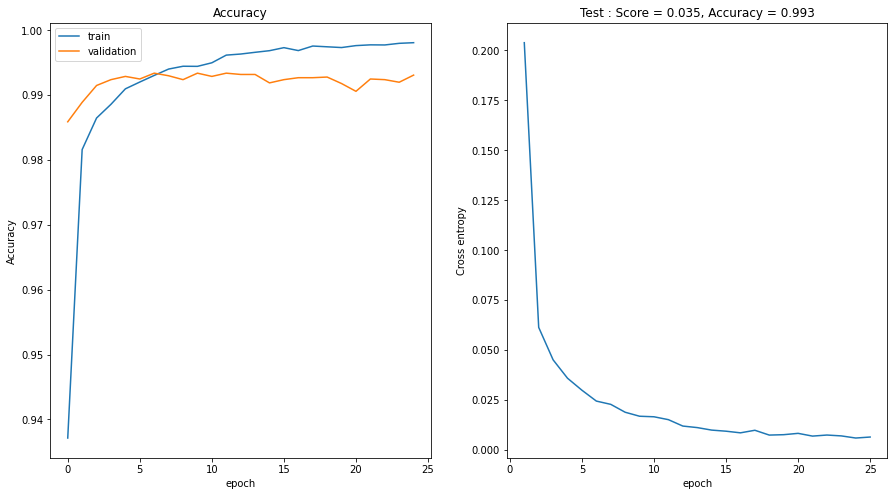

<Figure size 432x288 with 0 Axes>

In [ ]:
# Compute the metrics in test mode
score = model.evaluate(x_test, y_test, verbose=0)

# Print the results
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')

plt.subplot(1,2,2)
x = list(range(1,num_epochs+1))
l = hist.history['loss']
plt.xlabel('epoch')
plt.ylabel('Cross entropy')
plt.title("Test : Score = {0:5.3f}, Accuracy = {1:5.3f}".format(score[0], score[1]))
plt.plot(x,l)
plt.show()
plt.tight_layout()

## Display the incorrect classifications

Number of errors 69/10000




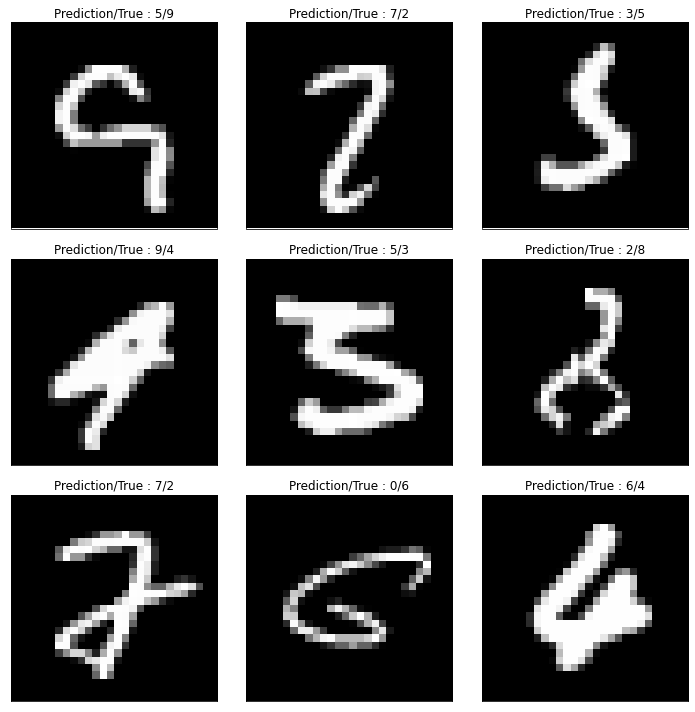

In [ ]:
predicted_classes = np.argmax(model.predict(x_test), axis=-1)
y = np.argmax(y_test,axis=1)

incorrects = np.nonzero(predicted_classes != y)[0]
plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrects[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title( "Prediction/True : {}/{}".format(predicted_classes[incorrects[i]], y[incorrects[i]]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
print("Number of errors {}/{}\n\n".format(incorrects.size,y.size))
